<a href="https://colab.research.google.com/github/urvihp1001/JPMorganQuant/blob/main/JPMorgan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [ ]:
natgas = pd.read_csv("Nat_Gas.csv",index_col=0)

In [ ]:
print(natgas.head)

<bound method NDFrame.head of           Prices
Dates           
10/31/20   10.10
11/30/20   10.30
12/31/20   11.00
1/31/21    10.90
2/28/21    10.90
3/31/21    10.90
4/30/21    10.40
5/31/21     9.84
6/30/21    10.00
7/31/21    10.10
8/31/21    10.30
9/30/21    10.20
10/31/21   10.10
11/30/21   11.20
12/31/21   11.40
1/31/22    11.50
2/28/22    11.80
3/31/22    11.50
4/30/22    10.70
5/31/22    10.70
6/30/22    10.40
7/31/22    10.50
8/31/22    10.40
9/30/22    10.80
10/31/22   11.00
11/30/22   11.60
12/31/22   11.60
1/31/23    12.10
2/28/23    11.70
3/31/23    12.00
4/30/23    11.50
5/31/23    11.20
6/30/23    10.90
7/31/23    11.40
8/31/23    11.10
9/30/23    11.50
10/31/23   11.80
11/30/23   12.20
12/31/23   12.80
1/31/24    12.60
2/29/24    12.40
3/31/24    12.70
4/30/24    12.10
5/31/24    11.40
6/30/24    11.50
7/31/24    11.60
8/31/24    11.50
9/30/24    11.80>


In [ ]:
natgas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 10/31/20 to 9/30/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


In [ ]:
natgas.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


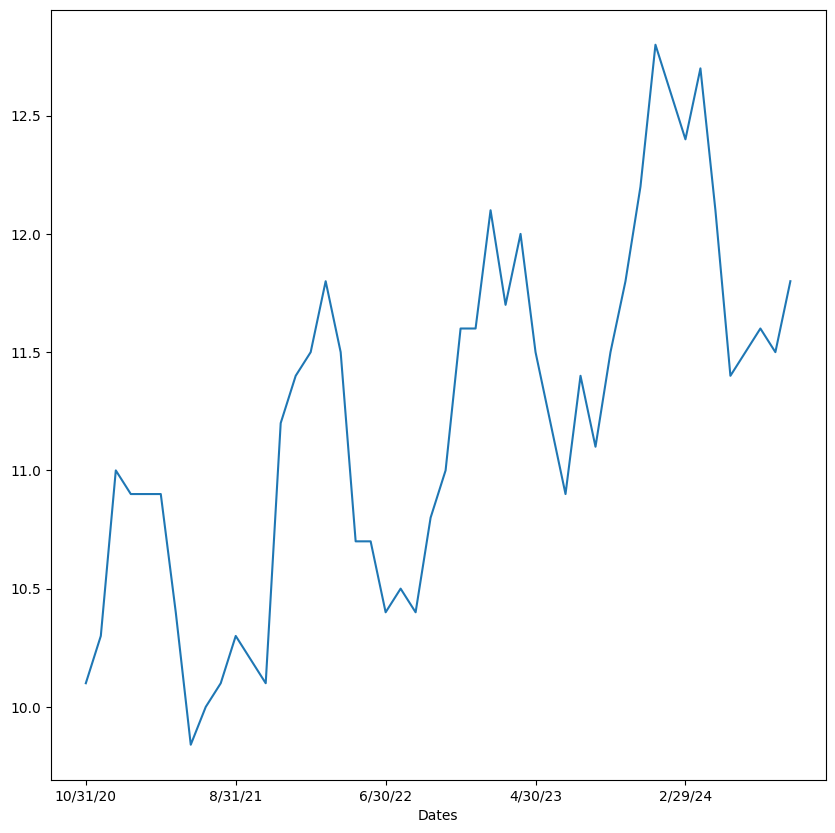

In [ ]:

ax=natgas['Prices'].plot(figsize=(10,10))
plt.show()

In [ ]:
natgas['SMA_3']=natgas.Prices.rolling(3).mean()
natgas['SMA_12']=natgas.Prices.rolling(12).mean()
print(natgas.head(15))


          Prices      SMA_3     SMA_12
Dates                                 
10/31/20   10.10        NaN        NaN
11/30/20   10.30        NaN        NaN
12/31/20   11.00  10.466667        NaN
1/31/21    10.90  10.733333        NaN
2/28/21    10.90  10.933333        NaN
3/31/21    10.90  10.900000        NaN
4/30/21    10.40  10.733333        NaN
5/31/21     9.84  10.380000        NaN
6/30/21    10.00  10.080000        NaN
7/31/21    10.10   9.980000        NaN
8/31/21    10.30  10.133333        NaN
9/30/21    10.20  10.200000  10.411667
10/31/21   10.10  10.200000  10.411667
11/30/21   11.20  10.500000  10.486667
12/31/21   11.40  10.900000  10.520000


          Prices      SMA_3     SMA_12
Dates                                 
10/31/20   10.10        NaN        NaN
11/30/20   10.30        NaN        NaN
12/31/20   11.00  10.466667        NaN
1/31/21    10.90  10.733333        NaN
2/28/21    10.90  10.933333        NaN
3/31/21    10.90  10.900000        NaN
4/30/21    10.40  10.733333        NaN
5/31/21     9.84  10.380000        NaN
6/30/21    10.00  10.080000        NaN
7/31/21    10.10   9.980000        NaN
8/31/21    10.30  10.133333        NaN
9/30/21    10.20  10.200000  10.411667
10/31/21   10.10  10.200000  10.411667
11/30/21   11.20  10.500000  10.486667
12/31/21   11.40  10.900000  10.520000


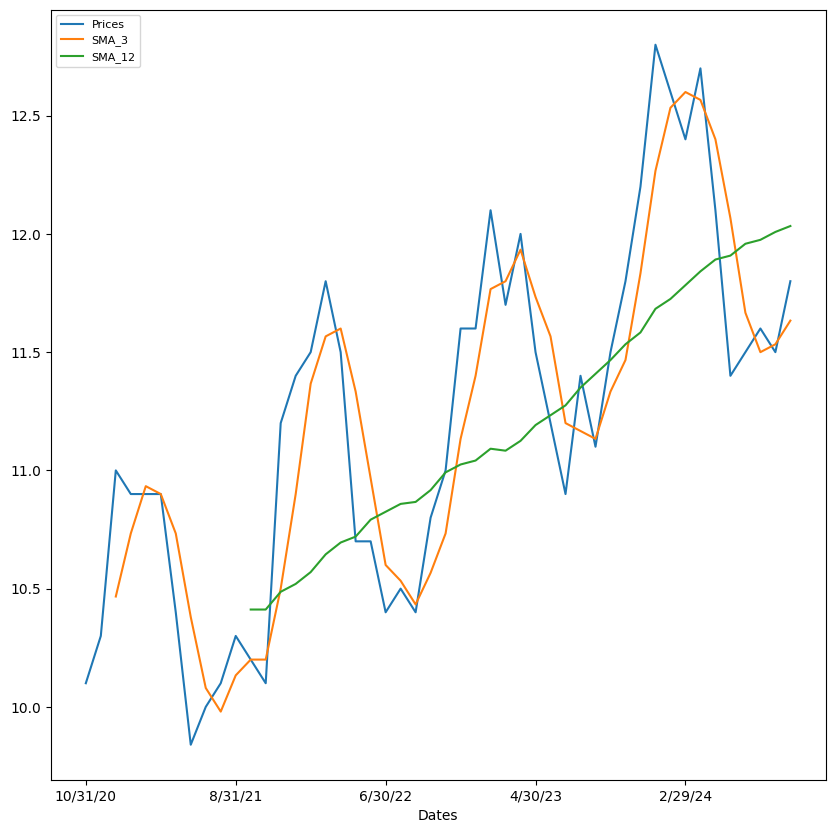

In [ ]:
natgas['SMA_3']=natgas.Prices.rolling(3).mean()
natgas['SMA_12']=natgas.Prices.rolling(12).mean()
print(natgas.head(15))
natgas.loc[:,['Prices','SMA_3','SMA_12']].plot(figsize=(10,10))
plt.legend(loc="upper left", fontsize=8)
plt.show()


In [ ]:
time=np.arange(1,len(natgas)+1)
natgas['time']=time
data=natgas[['time','Prices']]
print(data.tail())
print(time)
print(natgas.tail())


         time  Prices
Dates                
5/31/24    44    11.4
6/30/24    45    11.5
7/31/24    46    11.6
8/31/24    47    11.5
9/30/24    48    11.8
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
         Prices      SMA_3     SMA_12  time
Dates                                      
5/31/24    11.4  12.066667  11.908333    44
6/30/24    11.5  11.666667  11.958333    45
7/31/24    11.6  11.500000  11.975000    46
8/31/24    11.5  11.533333  12.008333    47
9/30/24    11.8  11.633333  12.033333    48


[ 0.03901324 10.25125887]


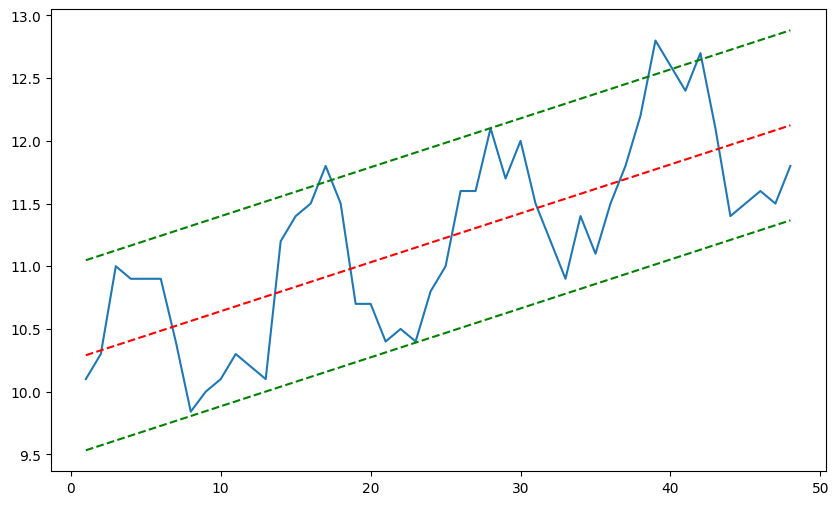

In [ ]:
reg=np.polyfit(data['time'],data['Prices'],deg=1)
print(reg)
trend=np.polyval(reg,data['time'])
std=data['Prices'].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'].values,data['Prices'].values)
plt.plot(data['time'].values,trend,'r--')
plt.plot(data['time'].values,trend-std,'g--')
plt.plot(data['time'].values,trend+std,'g--')
plt.show()


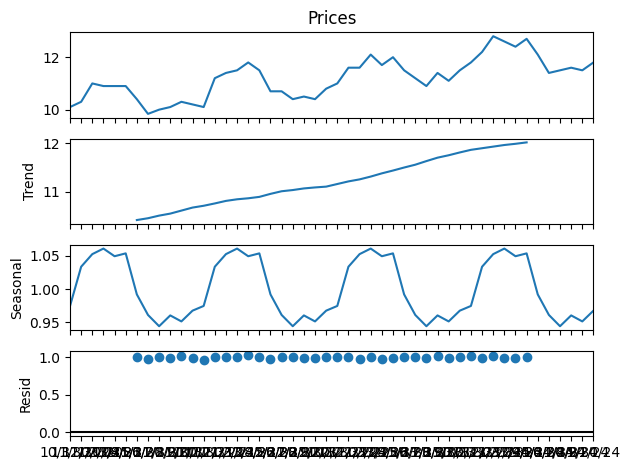

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(natgas['Prices'],model='multiplicative',period=12)
result.plot()
plt.show()



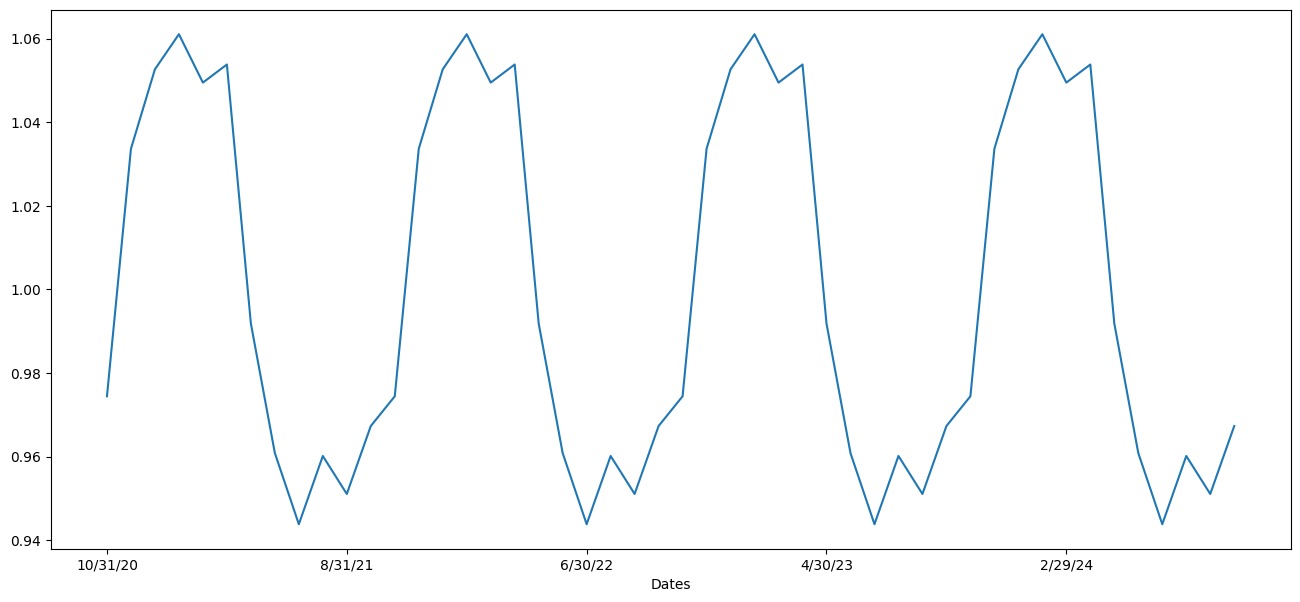

In [ ]:
plt.figure(figsize=(16,7))
result.seasonal.plot()
plt.show()

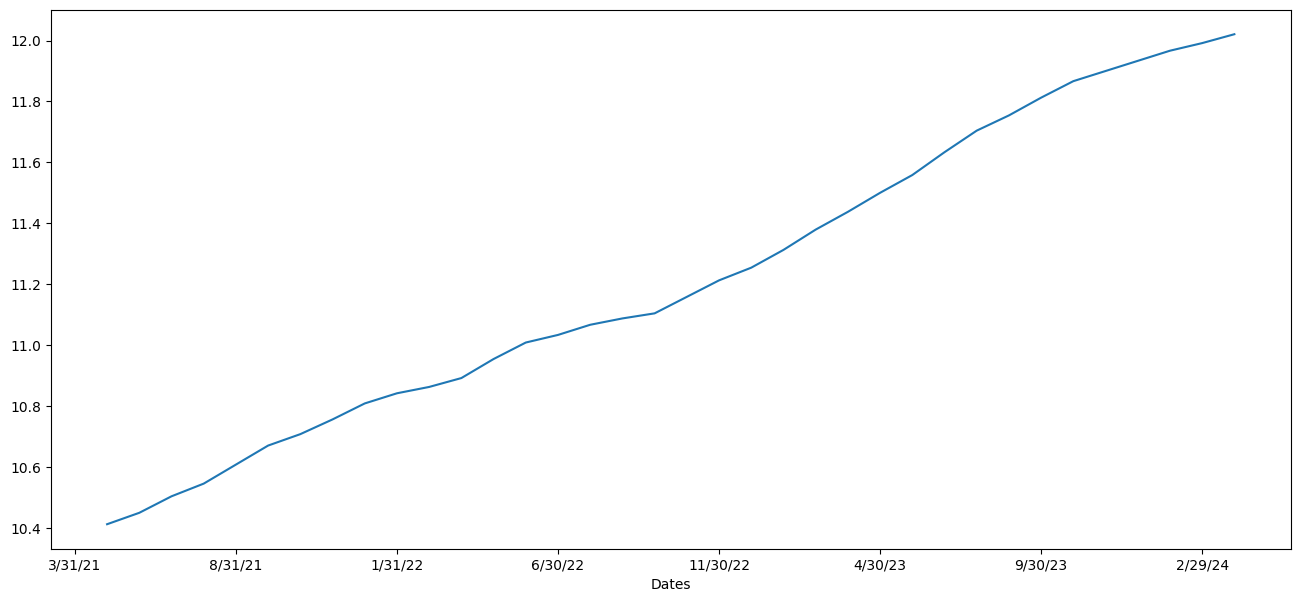

In [ ]:
plt.figure(figsize=(16,7))
result.trend.plot()
plt.show()

      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9
            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9


<ipython-input-9-7810427b7454>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nat_gas_df['Dates']=pd.to_datetime(nat_gas_df['Dates'])


NameError: name 'plt' is not defined

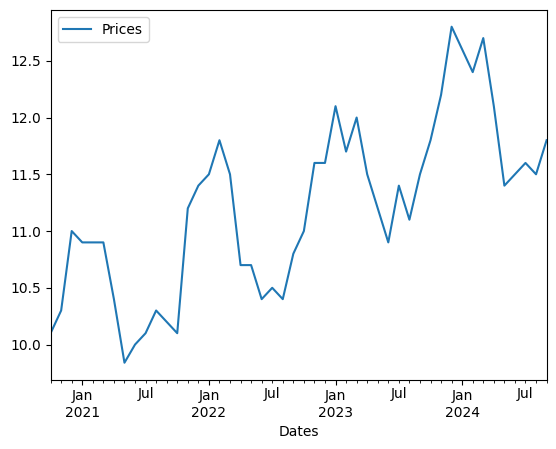

In [ ]:
nat_gas_df=pd.read_csv("Nat_Gas.csv")
print(nat_gas_df.head())
#SARIMAX= ARIMA+seasonal components that acc for seasonal behavior repeating over spec time interval (yr, days, month)
from statsmodels.tsa.statespace.sarimax import SARIMAX
nat_gas_df['Dates']=pd.to_datetime(nat_gas_df['Dates'])
#keep dates only as index
nat_gas_df.set_index('Dates',inplace=True)
print(nat_gas_df.head())
nat_gas_df.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
#H0: it is non-stationary
#H1: It is stationary

def adfuller_test(prices):
    result=adfuller(prices)
    labels=['ADF Test statistic','p-value','Number of Lags used','No. of observations used']
    adf_test=adfuller(prices)
    results=pd.Series(adf_test[0:4],index=labels)#set indices as given in labels list
    for key,value in adf_test[4].items():
        results[f'Critical Value ({key})']=value
    if result[1]<=0.05:
            print("strong evidence against null hypothesis. data has no unit root and is stationary")
    else:
            print("weak evidence against null hypothesis. data has unit root and is non stationary")
    return results
#stationary time series - data has mean, std, variance constant over time
#non stationary time series - variance can be misspecified by model, worse model fit, cannot leverage time-depedant patterns in data
print(adfuller_test(nat_gas_df['Prices']))


weak evidence against null hypothesis. data has unit root and is non stationary
ADF Test statistic           0.218077
p-value                      0.973257
Number of Lags used         10.000000
No. of observations used    37.000000
Critical Value (1%)         -3.620918
Critical Value (5%)         -2.943539
Critical Value (10%)        -2.610400
dtype: float64


In [ ]:
!pip install pmdarima

In [ ]:
!pip install numpy==1.23.5 --upgrade --force-reinstall
!pip install pmdarima --no-cache-dir --force-reinstall


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires 

ERROR: Operation cancelled by user
^C


In [ ]:
import pmdarima as pm
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
nat_gas_df=pd.read_csv("Nat_Gas.csv")
pm.auto_arima(nat_gas_df['Prices'],seasonal=True,m=12,max_p=7,max_d=5,max_q=7,max_P=4,max_D=4,max_Q=4,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True).summary()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.147, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.069, Time=1.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.330, Time=1.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.109, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=54.043, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(2,1,2)(0,0,0)[12] intercept
Total fit time: 7.987 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -12.055
Date:                Thu, 24 Apr 2025   AIC                             36.109
Time:                        18:08:07   BIC                             47.210
Sample:                             0   HQIC                            40.287
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.008      1.276      0.202      -0.005       0.025
ar.L1          1.6926      0.050     33.525      0.000       1.594       1.792
ar.L2         -0.9590      0.048    -19.946      0.000      -1.053      -0.865
ma.L1         -1.8031      0.277     -6.501      0.000      -2.347      -1.260
ma.L2          0.9498      0.307      3.094      0.002       0.348       1.552
sigma2         0.0896      0.030      3.003      0.003       0.031       0.148
===================================================================================
Ljung-Box (L1) (Q):                   6.30   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.01   Prob(JB):                         0.31
Heteroskedasticity (H):               0.86   Skew:                             0.51
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_data=nat_gas_df[:len(nat_gas_df)-12]
test_data=nat_gas_df[len(nat_gas_df)-12:]

In [ ]:
print(test_data)

       Dates  Prices
36  10/31/23    11.8
37  11/30/23    12.2
38  12/31/23    12.8
39   1/31/24    12.6
40   2/29/24    12.4
41   3/31/24    12.7
42   4/30/24    12.1
43   5/31/24    11.4
44   6/30/24    11.5
45   7/31/24    11.6
46   8/31/24    11.5
47   9/30/24    11.8


In [ ]:

arima_model=SARIMAX(train_data['Prices'],order=(2,1,2),seasonal_order=(1,1,1,12))
arima_result=arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   0.168
Date:                              Thu, 24 Apr 2025   AIC                             13.664
Time:                                      18:14:52   BIC                             21.612
Sample:                                           0   HQIC                            15.663
                                               - 36                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0966    174.505     -0.006      0.995    -343.119     340.926
ar.L2         -0.0968     17.037     -0.006      0.995     -33.488      33.295
ma.L1         -0.2542   2038.124     -0.000      1.000   -3994.904    3994.395
ma.L2         -0.7457   1519.857     -0.000      1.000   -2979.611    2978.119
ar.S.L12      -0.6443      0.742     -0.869      0.385      -2.098       0.809
ma.S.L12      -0.9986   2743.759     -0.000      1.000   -5378.668    5376.671
sigma2         0.0156     51.605      0.000      1.000    -101.129     101.160
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""